In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


In [3]:
objects='MetObjects_Cleaned3.csv'
object_df=pd.read_csv(objects)
object_df

,Object Number,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Display Name,Artist Nationality,Artist Begin Date,...,Country ID,Country,Region,Object Type,Sub Classification 1,Sub Classification 2,Rights and Reproduction,Link Resource,Object Wikidata URL,Tags
0,16.74.49,15,The American Wing,1916,Coin,"Coin, 1/2 Real",Mexican,NaN,NaN,NaN,...,46,Mexico,NaN,Silver,None,None,NaN,http://www.metmuseum.org/art/collection/search/15,NaN,NaN
1,16.74.27,16,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,NaN,...,46,Mexico,NaN,Metal,None,None,NaN,http://www.metmuseum.org/art/collection/search/16,NaN,NaN
2,16.74.28,17,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,NaN,...,46,Mexico,NaN,Metal,None,None,NaN,http://www.metmuseum.org/art/collection/search/17,NaN,NaN
3,16.74.29,18,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,NaN,...,46,Mexico,NaN,Metal,None,None,NaN,http://www.metmuseum.org/art/collection/search/18,NaN,NaN
4,16.74.30,19,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,NaN,...,46,Mexico,NaN,Metal,None,None,NaN,http://www.metmuseum.org/art/collection/search/19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29313,2020.64.151,839285,The American Wing,2020,Pitcher,"""Animal Kingdom"" cream pitcher",American,American Limoges China Company|Viktor Schrecke...,NaN,1901 |1906,...,71,United States,NaN,Ceramics,None,None,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN
29314,2020.64.152,839286,The American Wing,2020,Bowl,"""Animal Kingdom"" sugar bowl",American,Viktor Schreckengost|American Limoges China Co...,NaN,1906 |1901,...,71,United States,NaN,Ceramics,None,None,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN
29315,2020.64.153,839287,The American Wing,2020,Platter,"""Animal Kingdom"" small platter",American,Viktor Schreckengost|American Limoges China Co...,NaN,1906 |1901,...,71,United States,NaN,Ceramics,None,None,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN
29316,2020.66,839896,"Arts of Africa, Oceania, and the Americas",2020,Cloak,Cloak (Kaitaka aronui),Maori people,NaN,NaN,NaN,...,50,New Zealand,NaN,Costumes,Textiles,None,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN


In [4]:
object_df.dtypes

Object Number              object
Object ID                   int64
Department                 object
AccessionYear               int64
Object Name                object
Title                      object
Culture                    object
Artist Display Name        object
Artist Nationality         object
Artist Begin Date          object
Artist End Date            object
Object Begin Date           int64
Century Object Begin        int64
Object End Date             int64
Century Object End Date     int64
Credit Line                object
City                       object
State                      object
County                     object
Country ID                  int64
Country                    object
Region                     object
Object Type                object
Sub Classification 1       object
Sub Classification 2       object
Rights and Reproduction    object
Link Resource              object
Object Wikidata URL        object
Tags                       object
dtype: object

In [5]:
country_grp=object_df.groupby('Country')
country_grp.count()

,Object Number,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Display Name,Artist Nationality,Artist Begin Date,...,County,Country ID,Region,Object Type,Sub Classification 1,Sub Classification 2,Rights and Reproduction,Link Resource,Object Wikidata URL,Tags
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,35,35,35,35,35,35,35,0,0,0,...,19,35,1,35,35,35,0,35,0,0
Algeria,28,28,28,28,28,28,28,0,0,0,...,0,28,10,28,28,28,0,28,0,0
America,256,256,256,256,256,256,256,254,32,204,...,253,256,252,256,256,256,0,256,1,45
Angola,36,36,36,36,36,36,36,0,0,0,...,0,36,8,36,36,36,0,36,1,25
Australia,68,68,68,68,68,68,68,2,0,1,...,63,68,40,68,68,68,0,68,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,57,57,57,57,57,57,57,2,2,2,...,2,57,0,57,57,57,0,57,0,0
United Kingdom,193,193,193,193,193,193,193,116,60,69,...,106,193,3,193,193,193,0,193,3,5
United States,9202,9202,9202,9202,9202,9202,9202,5819,1658,5257,...,1215,9202,409,9202,9202,9202,54,9202,371,2150


<IPython.core.display.Javascript object>


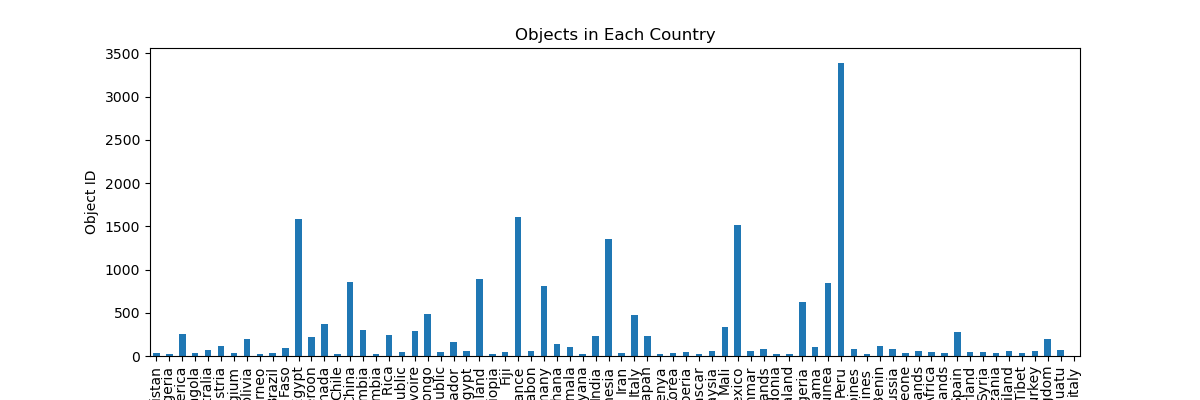

In [6]:
country_grp=object_df.groupby('Country')
num_obj=country_grp['Object ID'].count()

# drops the united states for better scaling of chart
num_obj = num_obj.drop(num_obj.index[70])

obj_chart = num_obj.plot(kind="bar", title="Objects in Each Country",figsize=(12,4))
obj_chart.set_xlabel("Country")
obj_chart.set_ylabel("Object ID")

plt.show()
# plt.tight_layout()


In [9]:
#Data Set Summary

# Calculate the total number of countries
total_country = len(object_df["Country ID"].unique())

# Calculate the total number of objects
total_objects = len(object_df["Object ID"].unique())

# Calculate the total number object types
total_object_types = len(object_df["Object Type ID"].unique())

# # Calculate the average math score
# math_avg = merge_df["math_score"].mean()

# # Calculate the average reading score
# reading_avg = merge_df["reading_score"].mean()

# # Calculate the percentage of students with a passing math score (70 or greater)
# pass_math_percent = merge_df.loc[merge_df["math_score"]>=70]["math_score"].count()/total_student

# # Calculate the percentage of students with a passing reading score (70 or greater)
# pass_reading_percent = merge_df.loc[merge_df["reading_score"]>=70]["reading_score"].count()/total_student

# # Calculate the percentage of students who passed math and reading (% Overall Passing)
# overall_pass_percent = merge_df[(merge_df["math_score"]>=70) & (merge_df["reading_score"]>=70)]["Student ID"].count()/total_student

# Create a dataframe to hold the above results
summary_df =  pd.DataFrame({"Total Countries":[total_country],
                                 "Total Objects":[total_objects],
                                  "Total Object Types":[total_object_types],
#                                  "Average Math Score":[math_avg],
#                                  "Average Reading Score":[reading_avg],
#                                  "% Passing Math":[pass_math_percent],
#                                  "% Passing Reading":[pass_reading_percent],
#                                  "% Overall Passing":[overall_pass_percent],
                                 })

# Optional: give the displayed data cleaner formatting
summary_df['Total Countries'] = summary_df['Total Countries'].map("{:,}".format)
summary_df['Total Objects'] = summary_df['Total Objects'].map("{:,}".format)
summary_df['Total Object Types'] = summary_df['Total Object Types'].map("{:,}".format)
# summary_df['Average Reading Score'] = summary_df['Average Reading Score'].map("{:,.2f}".format)
# summary_df['% Passing Math'] = summary_df['% Passing Math'].map("{:.1%}".format)
# summary_df['% Passing Reading'] = summary_df['% Passing Reading'].map("{:.1%}".format)
# summary_df['% Overall Passing'] = summary_df['% Overall Passing'].map("{:.1%}".format)


summary_df

KeyError: 'Object Types'

In [39]:
# Top ten object types
objects_grp=object_df.groupby('Object Type')
objects_grp.count().nlargest(10, 'Object ID')

,Object Number,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Display Name,Artist Nationality,Artist Begin Date,...,County,Country ID,Country,Region,Sub Classification 1,Sub Classification 2,Rights and Reproduction,Link Resource,Object Wikidata URL,Tags
Object Type,,,,,,,,,,,,,,,,,,,,,
Musical Instrument,3891,3891,3891,3891,3891,3891,3891,1017,514,560,...,987,3891,3891,162,3891,3891,0,3891,79,380
Ceramics,3890,3890,3890,3890,3890,3890,3890,1573,252,1512,...,1041,3890,3890,15,3890,3890,15,3890,113,2140
Sculpture,2990,2990,2990,2990,2990,2990,2990,314,60,220,...,1079,2990,2990,1019,2990,2990,1,2990,124,2437
Textiles,2626,2626,2626,2626,2626,2626,2626,664,152,466,...,582,2626,2626,769,2626,2626,8,2626,62,769
Glass,2581,2581,2581,2581,2581,2581,2581,1209,214,1019,...,345,2581,2581,218,2581,2581,5,2581,176,417
Ornaments,2406,2406,2406,2406,2406,2406,2406,1,0,0,...,275,2406,2406,349,2406,2406,0,2406,16,1034
Implements,1803,1803,1803,1803,1803,1803,1803,98,0,53,...,483,1803,1803,667,1803,1803,0,1803,1,479
Containers,1574,1574,1574,1574,1574,1574,1574,36,2,22,...,295,1574,1574,407,1574,1574,0,1574,12,716
Furniture,1494,1494,1494,1494,1494,1494,1494,583,237,546,...,61,1494,1494,99,1494,1494,28,1494,70,206


In [40]:
#Top ten countires by number of objects
country_grp=object_df.groupby('Country')
country_grp.count().nlargest(10, 'Object ID')

,Object Number,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Display Name,Artist Nationality,Artist Begin Date,...,County,Country ID,Region,Object Type,Sub Classification 1,Sub Classification 2,Rights and Reproduction,Link Resource,Object Wikidata URL,Tags
Country,,,,,,,,,,,,,,,,,,,,,
United States,9202,9202,9202,9202,9202,9202,9202,5819,1658,5257,...,1215,9202,409,9202,9202,9202,54,9202,371,2150
Peru,3393,3393,3393,3393,3393,3393,3393,4,1,0,...,40,3393,230,3393,3393,3393,0,3393,21,1455
France,1613,1613,1613,1613,1613,1613,1613,349,200,256,...,450,1613,64,1613,1613,1613,0,1613,144,597
Byzantine Egypt,1579,1579,1579,1579,1579,1579,1579,0,0,0,...,820,1579,0,1579,1579,1579,0,1579,0,961
Mexico,1516,1516,1516,1516,1516,1516,1516,24,3,8,...,499,1516,1160,1516,1516,1516,0,1516,38,647
Indonesia,1351,1351,1351,1351,1351,1351,1351,193,2,83,...,953,1351,586,1351,1351,1351,3,1351,3,378
England,895,895,895,895,895,895,895,355,110,256,...,505,895,7,895,895,895,0,895,13,430
China,854,854,854,854,854,854,854,20,1,8,...,17,854,2,854,854,854,0,854,10,473
Papua New Guinea,844,844,844,844,844,844,844,311,0,282,...,134,844,341,844,844,844,5,844,7,254


In [79]:
# country_df=object_df['Country'].dropna()
# country_df

In [80]:
# country_list=country_df.value_counts()


In [78]:
# unique=object_df['Country'].unique()
# unique

In [77]:
# region_df=object_df['Region'].dropna()
# region_df

In [76]:
# culture_df=object_df['Culture'].dropna()
# culture_df

In [70]:
# culture_list=culture_df.value_counts()
# print(culture_list.unique)

In [71]:
# culture_unique=object_df['Culture'].unique()
# culture_unique

In [72]:
# country_group_df=object_df.groupby(['Country'])
# country_group_df.count().head()

In [73]:


# cln_country_df=object_df.groupby('Country').filter(lambda x: len(x) > 80)
# cln_country_df

In [75]:
# cln_country_list=group_country_df['Counrty'].tolist()
# cln_country_list